In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import matplotlib.animation as animation
import imageio_ffmpeg
import statsmodels.api as sm # OLS module for linear regression
from ising import *
from graph_utils import *

/var/folders/vk/kftm8379123bsmwrdp8l0xr00000gn/T/ipykernel_3424/1786119512.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Ising on 2D lattice

## At fixed temperature

Preliminary step necessary to undersand how many equilibration steps are needed

- snapshots of the evolution
- plots of energy and magnetization relaxation

In [134]:
J = 1.0
theoretical_critical_temperature = J * ( 2 / np.log(1 + np.sqrt(2)) )
chosen_temp = theoretical_critical_temperature
n_linear = 20
N = n_linear ** 2
G = create_square_lattice(n_linear)
a = get_dense_adj_matrix(G)
pos = {(x, y): (x, y) for x, y in G.nodes()}
n_snap = 8
n_step = 1000
initial_state, final_state, df, snapshot_df = simulate_ising_fixed_temp(adjacency_matrix= a, T = chosen_temp, num_steps= n_step, n_snapshots = n_snap)
df.to_csv(f"2d_results_num_nodes_{N}_temp_{chosen_temp}.csv")
snapshot_df.to_csv(f"2d_snapshots_num_nodes_{N}_temp_{chosen_temp:.2f}.csv")

step number 0
step number 50
step number 100
step number 150
step number 200
step number 250
step number 300
step number 350
step number 400
step number 450
step number 500
step number 550
step number 600
step number 650
step number 700
step number 750
step number 800
step number 850
step number 900
step number 950


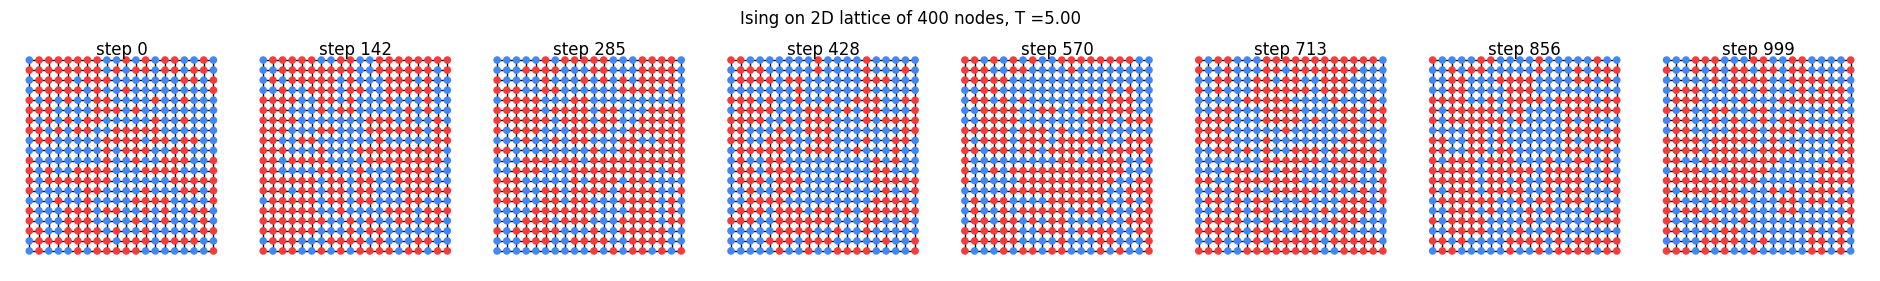

In [94]:
fig, axs = plt.subplots(1, n_snap, figsize = (3 * n_snap, 3))
plt.subplots_adjust(wspace = 0.05)
for i, snapshot_step in enumerate(np.linspace(0, n_step -1, n_snap, dtype = int)):
    nx.draw(G, pos, ax = axs[i], node_size=20, node_color= state_colors(snapshot_df[f'step_{snapshot_step}']))
    axs[i].set_title(f"step {snapshot_step}", y = 0.9)
plt.suptitle(f"Ising on 2D lattice of {N} nodes, T ={chosen_temp:.2f}")
plt.savefig(f"2d_snapshots_num_nodes{N}_temp_{chosen_temp}.pdf")

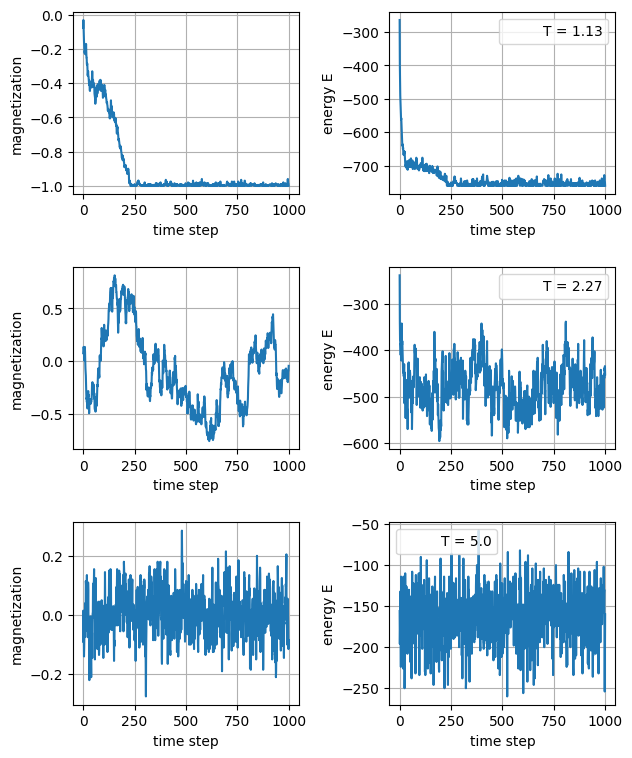

In [142]:
### Energy and Magnetization 
df = pd.read_csv("2d_results_num_nodes_400_temp_1.134592657106511.csv")
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows= 3, ncols= 2, figsize = (7,9))
plt.subplots_adjust(hspace= 0.4, wspace = 0.4)
ax1.plot(df['n_step'].iloc[0:1000], df['average_magnetization'].iloc[0:1000])
ax1.set_xlabel("time step")
ax1.set_ylabel("magnetization")
ax1.grid()
ax2.plot(df['n_step'].iloc[0:1000], df['energy'].iloc[0:1000])
ax2.set_xlabel("time step")
ax2.set_ylabel(r"energy E")
ax2.grid()
invisible_line = plt.Line2D([], [], linestyle="none", label='T = 1.13')
ax2.legend(handles=[invisible_line], labels=[invisible_line.get_label()])

df = pd.read_csv("2d_results_num_nodes_400_temp_2.269185314213022.csv")
ax3.plot(df['n_step'], df['average_magnetization'])
ax3.set_xlabel("time step")
ax3.set_ylabel("magnetization")
ax3.grid()
ax4.plot(df['n_step'], df['energy'])
ax4.set_xlabel("time step")
ax4.set_ylabel(r"energy E")
ax4.grid()
invisible_line = plt.Line2D([], [], linestyle="none", label='T = 2.27')
ax4.legend(handles=[invisible_line], labels=[invisible_line.get_label()])

df = pd.read_csv("2d_results_num_nodes_400_temp_5.csv")
ax5.plot(df['n_step'].iloc[0:1000], df['average_magnetization'].iloc[0:1000])
ax5.set_xlabel("time step")
ax5.set_ylabel("magnetization")
ax5.grid()
ax6.plot(df['n_step'].iloc[0:1000], df['energy'].iloc[0:1000])
ax6.set_xlabel("time step")
ax6.set_ylabel(r"energy E")
ax6.grid()
invisible_line = plt.Line2D([], [], linestyle="none", label='T = 5.0')
ax6.legend(handles=[invisible_line], labels=[invisible_line.get_label()])

plt.savefig("figures/2d_relaxation.pdf")

In [50]:
print(theoretical_critical_temperature)

2.269185314213022


## With temperature scaling

In [112]:
n_linear = 20
N = n_linear ** 2
G = create_square_lattice(n_linear)
a = get_dense_adj_matrix(G)
T_i = 1
T_f = 7
t_points = 50
df = simulate_ising(a, T_i, T_f, t_points=t_points, equilibration_steps=500, sweep_steps=500)

temperature 1.0, point 0/50
temperature 1.1224489795918366, point 1/50
temperature 1.2448979591836735, point 2/50
temperature 1.3673469387755102, point 3/50
temperature 1.489795918367347, point 4/50
temperature 1.6122448979591837, point 5/50
temperature 1.7346938775510203, point 6/50
temperature 1.8571428571428572, point 7/50
temperature 1.9795918367346939, point 8/50
temperature 2.1020408163265305, point 9/50
temperature 2.2244897959183674, point 10/50
temperature 2.3469387755102042, point 11/50
temperature 2.4693877551020407, point 12/50
temperature 2.5918367346938775, point 13/50
temperature 2.7142857142857144, point 14/50
temperature 2.836734693877551, point 15/50
temperature 2.9591836734693877, point 16/50
temperature 3.0816326530612246, point 17/50
temperature 3.204081632653061, point 18/50
temperature 3.326530612244898, point 19/50
temperature 3.4489795918367347, point 20/50
temperature 3.571428571428571, point 21/50
temperature 3.693877551020408, point 22/50
temperature 3.81632

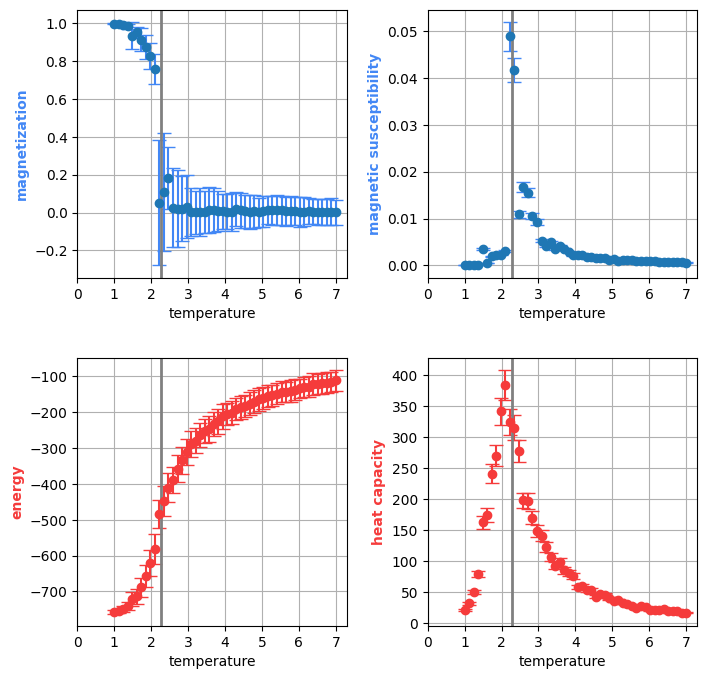

In [2]:
#df.to_csv("outputs_csv/2d_scaling.csv")
J = 1.0
theoretical_critical_temperature = J * ( 2 / np.log(1 + np.sqrt(2)) )
df = pd.read_csv("outputs_csv/2d_scaling.csv")
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (8, 8))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

ax1.errorbar(df['temperature'], df['abs_magnetization'], yerr = df['std_magnetization'], fmt='o', ecolor=my_blue, capsize=5)
ax1.set_xlabel("temperature")
ax1.set_xticks(np.arange(0, 8))
ax1.set_xticklabels(np.arange(0, 8), fontsize = 10)
ax1.axvline(x = theoretical_critical_temperature, color='grey', linestyle='-', linewidth=2)
ax1.set_ylabel("magnetization", color = my_blue, fontweight='bold')
ax1.grid()

ax2.errorbar(df['temperature'], df['susceptibility'], yerr = df['std_susceptibility'], fmt='o', ecolor=my_blue, capsize=5)
ax2.set_xlabel("temperature")
ax2.set_xticks(np.arange(0, 8))
ax2.set_xticklabels(np.arange(0, 8), fontsize = 10)
ax2.axvline(x = theoretical_critical_temperature, color='grey', linestyle='-', linewidth=2)
ax2.set_ylabel("magnetic susceptibility", color = my_blue, fontweight='bold')
ax2.grid()

ax3.errorbar(df['temperature'], df['energy'], yerr = df['std_energy'], fmt='o', color = my_red, ecolor=my_red, capsize=5)
ax3.set_xlabel("temperature")
ax3.set_xticks(np.arange(0, 8))
ax3.set_xticklabels(np.arange(0, 8), fontsize = 10)
ax3.axvline(x = theoretical_critical_temperature, color='grey', linestyle='-', linewidth=2)
ax3.set_ylabel("energy", color = my_red, fontweight='bold')
ax3.grid()

ax4.errorbar(df['temperature'], df['heat'], yerr = df['std_heat'], fmt='o', color = my_red, ecolor= my_red, capsize=5)
ax4.set_xlabel("temperature")
ax4.set_xticks(np.arange(0, 8))
ax4.set_xticklabels(np.arange(0, 8), fontsize = 10)
ax4.axvline(x = theoretical_critical_temperature, color='grey', linestyle='-', linewidth=2)
ax4.set_ylabel("heat capacity", color = my_red, fontweight='bold')
ax4.grid()
plt.savefig("figures/2d_scaling.pdf")

## Critical Temperature estimation

In [4]:
T_average, T_std = estimate_temperature(df)
print(f"{T_average} +- {T_std}")

[2.10204082 2.10204082 2.2244898  2.10204082]
2.13265306122449 +- 0.0530219634970067
